# Logistic regression

Let $\mathcal D = \{\boldsymbol x_i, y_i\}$, $y_i \in \{0, 1\}$.  **Logistic regression** model predicts the probability of the positive class:

$$
    \widehat y = \sigma(\boldsymbol x^\top \boldsymbol w) = \mathbb P(\boldsymbol x \in \text{class }1),
$$

where $\sigma(t) = \frac 1{1 + e^{-t}}$ — **sigmoid function**.


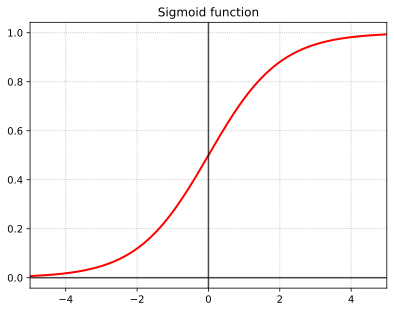

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit

%config InlineBackend.figure_formats = ['svg']

xs = np.linspace(-5, 5, num=401)
plt.plot(xs, expit(xs), c='r', lw=2)
plt.title("Sigmoid function")
plt.xlim(-5, 5)
plt.axhline(c="k", alpha=0.7)
plt.axvline(c="k", alpha=0.7)
plt.grid(ls=":");

**Q**. What is $\sigma'(t)$?

```{admonition} Answer
:class: tip, dropdown
$$
\sigma'(t) = \frac{e^{-t}}{(1+e^{-t})^2} = \sigma(t) (1-\sigma(t))
$$
```

The linear output $\boldsymbol x^\top \boldsymbol w$ is also called **logit**.

The loss function is binary cross-entropy

```{math}
:label: bin-log-reg-loss
    \begin{multline*}
    \mathcal L(\boldsymbol w) = -\frac 1n\sum\limits_{i=1}^n \big(y_i \log \widehat y_i + (1-y_i)\log(1-\widehat y_i)\big) = \\
    =-\frac 1n\sum\limits_{i=1}^n \big(y_i \log(\sigma(\boldsymbol x_i^\top \boldsymbol w)) + (1- y_i)\log(1 - \sigma(\boldsymbol x_i^\top \boldsymbol w))\big).
    \end{multline*}
```



````{admonition} Question
:class: important
How will the cross entropy loss change if $\mathcal Y = \{-1, 1\}$?

```{admonition} Answer
:class: tip, dropdown
In this case

$$
    \mathbb P(\boldsymbol x \in \text{class }1) = \sigma(\boldsymbol x^\top \boldsymbol w), \quad \mathbb P(\boldsymbol x \in \text{class }-1) = \sigma(-\boldsymbol x^\top \boldsymbol w).
$$

Hence,

$$
\begin{multline*}
\mathcal L(\boldsymbol w) = -\frac 1n\sum\limits_{i=1}^n [y_i = 1] \log\sigma(\boldsymbol x_i^\top \boldsymbol w) + [y_i = -1] \log\sigma(-\boldsymbol x_i^\top \boldsymbol w)
= \\
= -\frac 1n\sum\limits_{i=1}^n \log \sigma(y_i \boldsymbol x_i^\top \boldsymbol w) =
\frac 1n\sum\limits_{i=1}^n \log \big(1 + e^{y_i \boldsymbol x_i^\top \boldsymbol w}\big).
\end{multline*}
$$
```
````

## Regularization

The loss function for $L_2$-regularized logistic regression with is $\mathcal Y = \{-1, 1\}$

$$
\mathcal L(\boldsymbol w) = \frac 1n\sum\limits_{i=1}^n \log \big(1 + e^{y_i \boldsymbol x_i^\top \boldsymbol w}\big) + C \boldsymbol w^\top \boldsymbol w.
$$

There are also versions of $L_1$ penalizer or elastic net.

Quiz:
<span style="display:none" id="q1">W3sicXVlc3Rpb24iOiAiV2hhdFx1MjAxOXMgdGhlIGNvc3QgZnVuY3Rpb24gb2YgdGhlIGxvZ2lzdGljIHJlZ3Jlc3Npb24/IiwgInR5cGUiOiAibWFueV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImFuc3dlciI6ICJTaWdtb2lkIEZ1bmN0aW9uIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIlRoaW5rIGEgbGl0dGxlIGJpdCBtb3JlLiJ9LCB7ImFuc3dlciI6ICJMb2dpc3RpYyBGdW5jdGlvbiIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJBcmUgeW91IHN1cmUgYWJvdXQgdGhhdD8ifSwgeyJhbnN3ZXIiOiAiTG9naXN0aWMgYW5kIFNpZ21vaWQgZnVuY3Rpb24iLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJZZXMhIHRoYXQgaXMgY29ycmVjdCBhbnN3ZXIifSwgeyJhbnN3ZXIiOiAiTm9uZSBvZiB0aGUgYWJvdmUiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiTm8hIn1dfV0=</span>

<span style="display:none" id="q2">W3sicXVlc3Rpb24iOiAiSW4gbG9naXN0aWMgcmVncmVzc2lvbiwgdGhlIGxvZ2lzdGljIGxvc3MgZnVuY3Rpb24gcGVuYWxpemVzIHRoZSBtb2RlbCBtb3JlIHdoZW4gaXQgaXMgY29uZmlkZW50IGluIHByZWRpY3RpbmcgdGhlIGNvcnJlY3Qgb3V0Y29tZS4iLCAidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJzIjogW3siYW5zd2VyIjogIkZhbHNlIiwgImNvcnJlY3QiOiB0cnVlLCAiZmVlZGJhY2siOiAiWWVzISB0aGF0IGlzIGNvcnJlY3QuIEluIGxvZ2lzdGljIHJlZ3Jlc3Npb24sIHRoZSBsb2dpc3RpYyBsb3NzIGZ1bmN0aW9uIHBlbmFsaXplcyB0aGUgbW9kZWwgbW9yZSB3aGVuIGl0IGlzIGNvbmZpZGVudCBpbiBwcmVkaWN0aW5nIHRoZSBpbmNvcnJlY3Qgb3V0Y29tZSwgbm90IHRoZSBjb3JyZWN0IG9uZS4gSWYgdGhlIG1vZGVsIGlzIGNvbmZpZGVudCBpbiBwcmVkaWN0aW5nIHRoZSBjb3JyZWN0IG91dGNvbWUsIHRoZSBsb3NzIGlzIHJlbGF0aXZlbHkgbG93LiBUaGUgbG9zcyBpbmNyZWFzZXMgc2lnbmlmaWNhbnRseSB3aGVuIHRoZSBwcmVkaWN0ZWQgcHJvYmFiaWxpdHkgZGl2ZXJnZXMgZnJvbSB0aGUgYWN0dWFsIG91dGNvbWUsIGVzcGVjaWFsbHkgd2hlbiB0aGUgbW9kZWwgaXMgY29uZmlkZW50IGluIGFuIGluY29ycmVjdCBwcmVkaWN0aW9uLiJ9LCB7ImFuc3dlciI6ICJUcnVlIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkFyZSB5b3Ugc3VyZSBhYm91dCB0aGF0PyJ9XX1d</span>

<span style="display:none" id="q3">W3sicXVlc3Rpb24iOiAiVGhlIGxvZ2lzdGljIGxvc3MgZnVuY3Rpb24gZm9yIGEgc2luZ2xlIHRyYWluaW5nIGV4YW1wbGUgaSBpcyBnaXZlbiBieTogSihcdTAzYjgpPVx1MjIxMnleKGkpbG9nKGgoXHUwM2I4KSh4XihpKSlcdTIyMTIoMVx1MjIxMnleKGkpKWxvZygxXHUyMjEyaChcdTAzYjgpKHheKGkpKS4gSWYgeV4oaSk9MSwgd2hhdCBoYXBwZW5zIHRvIHRoZSBsb3NzIGlmIHRoZSBwcmVkaWN0ZWQgcHJvYmFiaWxpdHkgaFx1MDNiOCh4KGkpKSBhcHByb2FjaGVzIDE/IiwgInR5cGUiOiAibWFueV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImFuc3dlciI6ICJUaGUgbG9zcyBpbmNyZWFzZXMgc2lnbmlmaWNhbnRseS4iLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICIgQ29ycmVjdCEgR2l2ZW4gZnVuY3Rpb24gSihcdTAzYjgpIGFib3ZlLiBBbmQgdGhlIHNjZW5hcmlvIHdoZXJlIHleKGkpPTEsIGxldCdzIGFuYWx5emUgdGhlIGVmZmVjdCBvbiB0aGUgbG9zcyBpZiB0aGUgcHJlZGljdGVkIHByb2JhYmlsaXR5IGgoXHUwM2I4KSh4XihpKSkgYXBwcm9hY2hlcyAxOiBKKFx1MDNiOCk9XHUyMjEyMSpsb2coaChcdTAzYjgpKHheKGkpKSlcdTIyMTIoMVx1MjIxMjEpKmxvZygxXHUyMjEyaChcdTAzYjgpKHgoaSkpKS4gVGhlIGZpcnN0IHRlcm0gXHUyMjEyMVx1MjJjNWxvZyhoKFx1MDNiOCkoeF4oaSkpKSB3aWxsIGluY3JlYXNlIHNpZ25pZmljYW50bHkgYXMgaChcdTAzYjgpKHheKGkpKSBhcHByb2FjaGVzIDEgYmVjYXVzZSBsb2coMSkgaXMgMCwgYW5kIGxvZyh4KSBmb3IgMDx4PDEgaXMgbmVnYXRpdmUuIEFzIGgoXHUwM2I4KSh4XihpKSkgZ2V0cyBjbG9zZXIgdG8gMSwgdGhlIGxvc3MgaW5jcmVhc2VzLiJ9LCB7ImFuc3dlciI6ICJUaGUgbG9zcyBkZWNyZWFzZXMgc2lnbmlmaWNhbnRseS4iLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiIn0sIHsiYW5zd2VyIjogIlRoZSBsb3NzIHJlbWFpbnMgdW5jaGFuZ2VkLiIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICIifSwgeyJhbnN3ZXIiOiAiVGhlIGxvc3MgYmVjb21lcyB6ZXJvLiIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICIifV19XQ==</span>

<span style="display:none" id="q4">W3sicXVlc3Rpb24iOiAiV2hhdCBpcyB0aGUgbWFpbiBvYmplY3RpdmUgZHVyaW5nIHRyYWluaW5nIGluIGxvZ2lzdGljIHJlZ3Jlc3Npb24/IiwgInR5cGUiOiAibWFueV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImFuc3dlciI6ICJNYXhpbWl6ZSB0aGUgbGlrZWxpaG9vZCBmdW5jdGlvbi4iLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiIn0sIHsiYW5zd2VyIjogIk1pbmltaXplIHRoZSBzdW0gb2Ygc3F1YXJlZCBlcnJvcnMuIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIiJ9LCB7ImFuc3dlciI6ICJNaW5pbWl6ZSB0aGUgbG9naXN0aWMgbG9zcyBmdW5jdGlvbi4iLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICIifSwgeyJhbnN3ZXIiOiAiTWF4aW1pemUgdGhlIFItc3F1YXJlZCB2YWx1ZS4iLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiIn1dfV0=</span>

<span style="display:none" id="q5">W3sicXVlc3Rpb24iOiAiV2hhdCBpcyB0aGUgbWFpbiBvYmplY3RpdmUgZHVyaW5nIHRyYWluaW5nIGluIGxvZ2lzdGljIHJlZ3Jlc3Npb24/IiwgInR5cGUiOiAibWFueV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImFuc3dlciI6ICJNYXhpbWl6ZSB0aGUgbGlrZWxpaG9vZCBmdW5jdGlvbi4iLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiIn0sIHsiYW5zd2VyIjogIk1pbmltaXplIHRoZSBzdW0gb2Ygc3F1YXJlZCBlcnJvcnMuIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIiJ9LCB7ImFuc3dlciI6ICJNaW5pbWl6ZSB0aGUgbG9naXN0aWMgbG9zcyBmdW5jdGlvbi4iLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICIifSwgeyJhbnN3ZXIiOiAiTWF4aW1pemUgdGhlIFItc3F1YXJlZCB2YWx1ZS4iLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiIn1dfV0=</span>

In [8]:
from jupyterquiz import display_quiz

display_quiz('#q1')

<IPython.core.display.Javascript object>

In [9]:
display_quiz('#q2')

<IPython.core.display.Javascript object>

In [10]:
display_quiz('#q3')

<IPython.core.display.Javascript object>

In [11]:
display_quiz('#q4')

<IPython.core.display.Javascript object>

In [12]:
display_quiz('#q5')

<IPython.core.display.Javascript object>

## Example: breast cancer dataset

This is a dataset with $30$ features and binary target.

In [66]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data['data'].shape, data['target'].shape

cancer = load_breast_cancer()
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))

df.describe()
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [62]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
# The estimated coefficients will all be around 1:
#print(log_reg.coef_)

# Those values, however, will show that the second parameter
# is more influential
l = list(np.std(X_test, 0)*log_reg.coef_[0])

l = [abs(val) for val in l]
l

cols = list(df.columns[:-1])
cols

df = pd.DataFrame.from_dict({'features': cols,
                   'coefs': l})
df
mean perimeter
mean area

,features,coefs
0,mean radius,2.692735
1,mean texture,2.528166
2,mean perimeter,10.817330
3,mean area,10.102101
4,mean smoothness,0.000506
5,mean compactness,0.008166
6,mean concavity,0.014890
7,mean concave points,0.002847
8,mean symmetry,0.001515
9,mean fractal dimension,0.000082


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


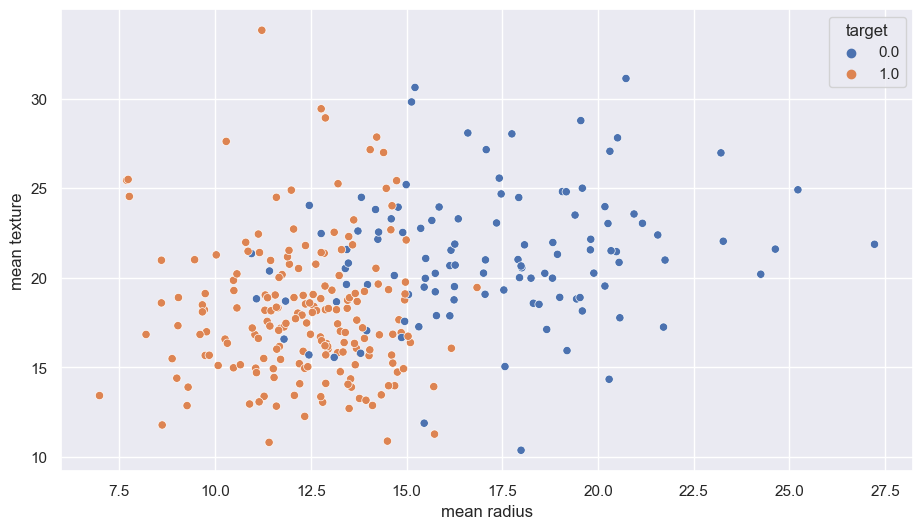

In [100]:
%pylab inline

import seaborn as sns
sns.set(rc={'figure.figsize':(11,6)})

sns.scatterplot(x='mean radius', y='mean texture', hue='target', data=df.sample(300, random_state=1))

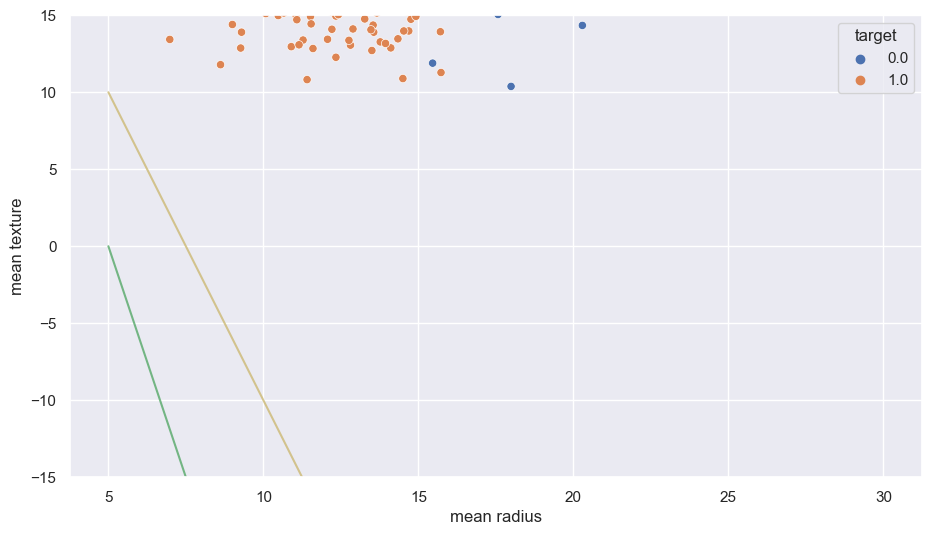

In [119]:
import numpy as np

sns.scatterplot(x='mean radius', y='mean texture', hue='target', data=df.sample(300, random_state=1))

lines = [([0, -5], 'g'),
         ([-3, -4], 'y')]

k = -6
b = 30
x = np.linspace(5, 30, 2)
y = k*x + b
plt.plot(x, y, color='g', alpha=0.8)


k = -4
b = 30
x = np.linspace(5, 30, 10)
y = k*x + b
plt.plot(x, y, color='y', alpha=0.8)

plt.ylim((-15, 15));

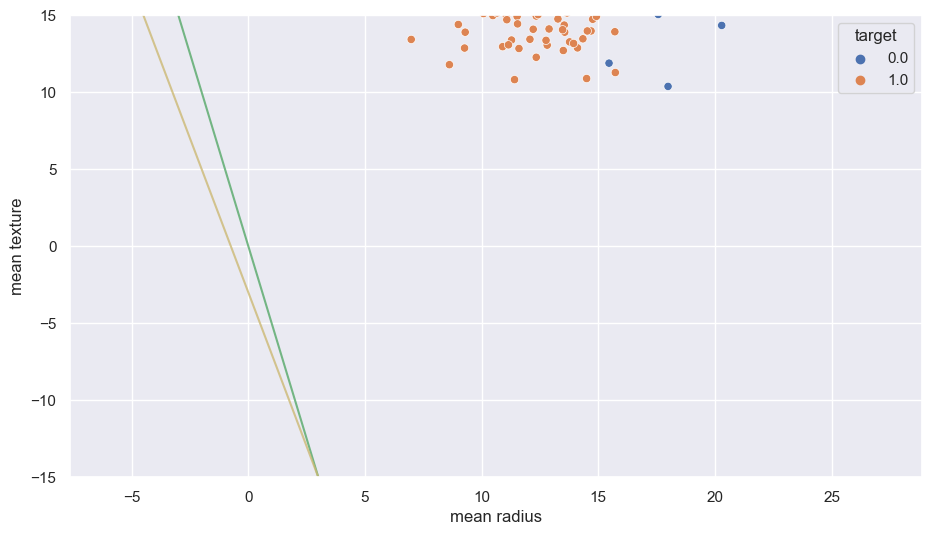

In [103]:
import numpy as np

sns.scatterplot(x='mean radius', y='mean texture', hue='target', data=df.sample(300, random_state=1))

lines = [([0, -5], 'g'),
         ([-3, -4], 'y')]

for line in lines:
    x = np.linspace(-6, 6, 100)
    y = line[0][0] + x*line[0][1]
    plt.plot(x, y, color=line[1], alpha=0.8)
plt.ylim((-15, 15));

In [60]:
from sklearn.metrics import accuracy_score

acc = []
for line in lines:
    pred = ds['skewness'] - line[0][1]*ds['variance'] - line[0][0] < 0
    acc.append(accuracy_score(ds['class'], pred))

print(f"Точность для зеленой прямой: {acc[0]:.3}")
print(f"Точность для желтой прямой: {acc[1]:.3}")

[2.6927351280215306, 2.528166393628669, 10.817329919561091, 10.102101175564226, 0.0005055316339854576, 0.00816570454160902, 0.014890475424287642, 0.002847278230962775, 0.0015148795697778922, 8.201507779793536e-05, 0.003174560762397326, 0.17882065764613644, 0.02635444247671261, 3.800703235568071, 8.949980109366894e-06, 0.0005175405541937549, 0.0009484602721457914, 5.562380477419086e-05, 7.670830277661985e-05, 5.423948907396026e-06, 3.485695788623512, 3.9681595789777533, 8.969687150981033, 5.334002985275836, 0.001629154536497331, 0.08103196730102924, 0.11738317452703656, 0.010238104020179037, 0.0102318595217241, 0.0009596172506174203]


In [ ]:
z = np.linspace(-10, 10, 100)
sigma = 1/(1+np.exp(-z))
plt.plot(z, sigma)
plt.ylim(-0.1, 1.1)
plt.xlabel('$z$')
plt.title('График логистической функции $\sigma(z)$');

In [ ]:
from scipy.stats import norm

np.random.seed(10)

mean_0 = 0.7
std_0 = 0.3

mean_1 = -0.5
std_1 = 0.4

nsamples_0 = 100
nsamples_1 = 100

samples_0 = mean_0 + sqrt(std_0)*np.random.randn(nsamples_0)
samples_1 = mean_1 + sqrt(std_1)*np.random.randn(nsamples_1)

x_0 = np.linspace(mean_0 - 5*std_0, mean_0 + 5*std_0, 100)
x_1 = np.linspace(mean_1 - 5*std_1, mean_1 + 5*std_1, 100)


from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(np.hstack((samples_0, samples_1)).reshape(-1, 1),
                               np.hstack(([1]*nsamples_0, [0]*nsamples_1)))
theta_0 = clf.intercept_[0]
theta_1 = clf.coef_[0][0]

x = np.linspace(mean_1 - 5*std_1, mean_0 + 5*std_0)
sigma = 1/(1 + np.exp(-(theta_0 + theta_1*x)))

draw_samples = 25

plt.scatter(x = np.random.choice(samples_0, draw_samples), y = [0]*draw_samples, color='red', s=20)
plt.plot(x_0, norm.pdf(x_0, mean_0, std_0), color='red', alpha=0.6)

plt.scatter(x = np.random.choice(samples_1, draw_samples), y = [0]*draw_samples, color='blue', s=20)
plt.plot(x_1, norm.pdf(x_1, mean_1, std_1), color='blue', alpha=0.6)

plt.plot(x, sigma, color='orange')
plt.axhline(0.5, color='black', linestyle='--')
plt.axvline(-theta_0/theta_1, color='black', linestyle='--')
plt.text(-theta_0/theta_1 + 0.2, -0.1, '$P(y=1|x) > 0.5$')
plt.text(-theta_0/theta_1 - 1.3, -0.1, '$P(y=1|x) < 0.5$')
plt.title('Разделение двух распределений')

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
h = np.linspace(0.01, 0.99, 100)
ax[0].plot(h, -np.log(1 - h))
ax[0].set_xlabel('$h_{\\theta}(x)$')
ax[0].set_title('$y = 0, -\\log (1-h_\\theta(x^{(i)}))$')
ax[1].plot(h, -np.log(h))
ax[1].set_xlabel('$h_{\\theta}(x)$')
ax[1].set_title('$y = 1, -\\log h_\\theta(x^{(i)})$');На левом графике хорошо видно, что в случае, когда истинный класс ($y = 0$), то данная функция потерь награждает нас, когда гипотеза $h_\theta(x) \rightarrow 0$ и штрафует, когда $h_\theta(x) \rightarrow 1$. В случае другого класса $(y = 1$) все с точностью до наоборот. Функция потерь награждает нас при $h_\theta(x) \rightarrow 1$ и штрафует при $h_\theta(x) \rightarrow 0$.

Посмотрим как выглядит сумма подобных штрафов для всей обучающей выборки в зависимости от параметра $\theta$.

In [ ]:
def logloss(theta, x, y):
    n = len(y)
    def sigma(z):
        return 1/(1 + np.exp(-z))
    return -1/n*np.sum(y*np.log(sigma(theta*x)) + (1-y)*np.log(1 - sigma(theta*x)))

In [ ]:
x = ds['variance']
y = ds['class']

theta = np.linspace(-10, 10, 100)
L = [logloss(th, x, y) for th in theta]
plt.plot(theta, L)
plt.xlabel('$\\theta$')
plt.ylabel('$L(\\theta)$')
plt.title('График логистической функции потерь для задачи классификации');

In [ ]:
def sigma(z):
    return 1/(1+np.exp(-z))

def grad(y, X, theta):
    n = y.shape[0]
    return 1/n * X.transpose() @ (sigma(X @ theta) - y)

def L(y, X, theta):
    n = y.shape[0]
    return -1/(n)*np.sum(y*np.log(sigma(X @ theta)) + (1 - y)*np.log(1 - sigma(X @ theta)))

def fit(y, X, theta_0, alpha=0.001, nsteps = 100):
    theta = np.copy(theta_0)
    loss = [L(y, X, theta)]
    for i in range(nsteps):
        theta -= alpha*grad(y, X, theta)
        loss.append(L(y, X, theta))
    return loss, theta

In [ ]:
X = ds[['variance', 'skewness']]
y = ds['class']

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)

norm_X = (X - X_mean)/X_std

In [ ]:
n = len(X)
X = np.hstack((np.ones((n, 1)), norm_X))
m = 2
theta_0 = np.zeros(m + 1)
loss_history, theta_star = fit(y, X, theta_0, alpha=1e-2, nsteps=5000)

In [ ]:
plt.plot(loss_history)
plt.xlabel('$k$')
plt.ylabel('$L(\\theta^{(k)})$')
plt.title('Кривая обучения');

In [ ]:
theta_star

In [ ]:
sns.scatterplot(x='variance', y='skewness', hue='class', data=ds.sample(500));

x_tmp = np.linspace(-6, 6, 100)
y_tmp = - (theta_star[0] + (x_tmp - X_mean[0])/X_std[0]*theta_star[1])/theta_star[2]

plt.plot(x_tmp, X_std[1]*y_tmp + X_mean[1] , color="green", alpha=0.8, linestyle='--')
plt.ylim((-15, 15));

In [ ]:
y_pred = X @ theta_star > 0
logreg_score = accuracy_score(y, y_pred)
print(f'Logistic Regression accuracy: {logreg_score:.3f}')

In [27]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance

# initialize sample (using the same setup as in KT.'s)
X = np.random.standard_normal((100,3)) * [1, 4, 0.5]
y = (3 + X.sum(axis=1) + 0.2*np.random.standard_normal()) > 0

# fit a model
model = LogisticRegression().fit(X, y)
# compute importances
model_fi = permutation_importance(model, X, y)
model_fi['importances_mean']    

array([0.018, 0.352, 0.   ])

In [5]:
import os
os.getcwd()

'/Users/yerassyl/Desktop/ML/log_reg_book/logistic_regression'